In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
file_path = '/content/drive/MyDrive/100 Days of ML/100-days-of-machine-learning-main/day48-simple-linear-regression/placement.csv'
dataset = pd.read_csv(file_path)

In [34]:
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [35]:
dataset.shape

(200, 2)

Text(0, 0.5, 'Package(in LPA)')

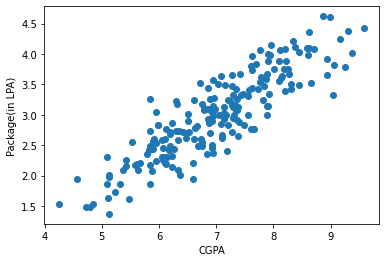

In [36]:
plt.scatter(dataset['cgpa'],dataset['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [37]:
X = dataset.iloc[:,0:1]
y = dataset.iloc[:,-1]

In [38]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [39]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
# fit used to train the model on trained data selected above
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
# test data 
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [45]:
# values corresponding to test data
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [46]:
# will predict test data x and compare with true value of y corresponding to test data x
lr.predict(X_test.iloc[0].values.reshape(1,1)) # x test = 8.58 true y = 4.1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.89111601])

In [47]:
lr.predict(X_test.iloc[1].values.reshape(1,1)) # x test = 7.15 true y = 3.49

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.09324469])

In [48]:
lr.predict(X_test.iloc[2].values.reshape(1,1)) # x test = 5.88 true y = 2.08

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([2.38464568])

Text(0, 0.5, 'Package(in LPA)')

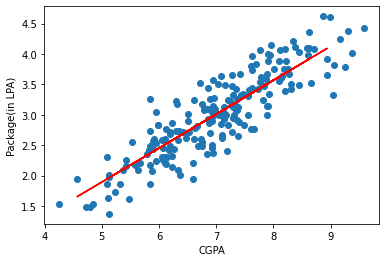

In [49]:
# Best Fit Line for test data
plt.scatter(dataset['cgpa'],dataset['package'])
plt.plot(X_test, lr.predict(X_test), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

Text(0, 0.5, 'Package(in LPA)')

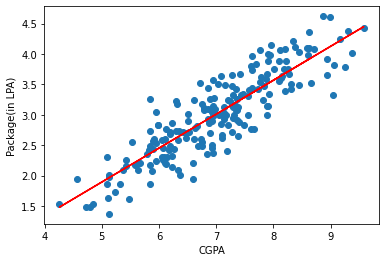

In [50]:
# Best Fit Line for train data y_cap = m*x + b
plt.scatter(dataset['cgpa'],dataset['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [51]:
m = lr.coef_
m

array([0.55795197])

In [52]:
b = lr.intercept_
b

-0.8961119222429144

In [53]:
# y = m*x + b
y_cap = m*8.58 + b
y_cap

array([3.89111601])

In [54]:
y_cap = m*7.15 + b
y_cap

array([3.09324469])

In [55]:
# lets predict for cgpa(x) = 9.5
y_cap = m*9.5 + b
y_cap

array([4.40443183])

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
# predicted result on test/unseen data
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [59]:
# actual result on test/unseen data
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [64]:
print('MAE', mean_absolute_error(y_test,y_pred))
# on an avg 0.28 lpa gadbad kar rha hai model # lpa

MAE 0.2884710931878175


In [65]:
print('MSE', mean_squared_error(y_test,y_pred)) # lpa^2

MSE 0.12129235313495527


In [66]:
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred))) # no direct method for RMSE # lpa

RMSE 0.34827051717731616


In [68]:
print('R2 SCORE', r2_score(y_test,y_pred))
# cpga column explaining 78% of variance in package 

R2 SCORE 0.780730147510384


In [69]:
r2 = r2_score(y_test,y_pred)

In [71]:
# Adjusted R2 score
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415